# Backprogation Algorithm (Adim Adim anlatimi)

# Dr.Öğr.Üyesi YILMAZ ATAY 
ylmzatay@gmail.com

# ULANBEK TOKTOGULOV
ulanbek.toktogulov@gmail.com

# Kaynaklar
https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
https://github.com/mattm/simple-neural-network/blob/master/neural-network.py
https://www.youtube.com/watch?v=sVjBqjDWoQA&ab_channel=CloudxLabOfficial
https://www.youtube.com/watch?v=4Cu9fizAtAo&ab_channel=CloudxLabOfficial

In [4]:
def double_it(x):
    return 2*x

def apply_transformation(f, arr):
    result = []
    for a in arr:
        v = f(a)
        result.append(v)
    return result
apply_transformation(double_it, [1,2,4])

[2, 4, 8]

# Differentiation


In [80]:
def sq(x):
    return x*x

In [81]:
def diff(fn, x):
    delta = 0.000000000001
    y = fn(x)
    x1 = x+delta
    y1 = fn(x1)
    return (y1-y)/(x1-x)

In [82]:
diff(sq,2)

4.0

In [83]:
diff(sq,4)
# x*x 2x

8.0

In [7]:
diff(sq,4)

8.0

In [8]:
diff(sq,5)

10.0

In [84]:
def cb(x):
    
    return x*x*x
# 3x*x

In [12]:
diff(cb,2)

12.0

In [85]:
diff(cb,3)

27.00177619893428

# Partial Derivative (Kısmi Türev)

In [13]:
#burada basit bir fonksiyon olusur
def fn(x1,x2):
    return x1*5+x2*x2
#bu fonksiyonun x1 ciktisini hesaplayalim

x1 = 10
x2 = 20
delta_x = 0.000000000001

delta_y = fn(x1+delta_x,x2)-fn(x1,x2)
df_dx1= delta_y/delta_x
print(df_dx1)

5.002220859751105


In [14]:
#simdi ise x2 ciktisini hesaplayalim
delta_y = fn(x1,x2+delta_x)-fn(x1,x2)
df_dx2 = delta_y/delta_x
print(df_dx2)

39.960923459148034


In [16]:
# Genellestirelim
import numpy as np 
# fn fonksiyonu
# idx turev girdisi
# *args degisken, degerler degisebilir. fonksiyon ile cagirilir
def diffp(fn,idx, *args):
    delta = 0.000000000001
    y= fn(*args)
    args= list(args)
    args[idx]+=delta
    y1 = fn(*args)
    return (y1-y)/delta

In [17]:
def line_y(m,c,x):
    return m*x+c


In [18]:
diff(line_y, 0 , 1 , 2, 3)

3.000266701747023

# Chain rule(Zincir Kurali)

Calculus-II : Kısmi Türevde Zincir Kuralı (Chain Rule)
#https://www.youtube.com/watch?v=F13ypBH4h6o&ab_channel=BUdersBo%C4%9Fazi%C3%A7iliden%C3%96zelDers

In [26]:
def sq(x):
    return x*x

def cb(t):
    return t*t*t

def sqcb(x):
    t = sq(x)
    y = cb(t)
    return y

In [27]:
diffp(sqcb,0,2)  

192.01706891180947

In [28]:
x= 2
dt_dx = diffp(sq,0, x)


In [29]:
t = sq(2)
dy_dt = diffp(cb, 0, t)

In [30]:
dt_dx*dy_dt

192.03413934105515

#  Gradient desent 

In [92]:
# oncelikle veri olusturalim

import numpy as np
X = 2*np.random.random((100,1))

In [93]:
y = 4 + 3*X + .3*np.random.randn(100,1)

In [94]:
y[0:3]

array([[7.19062959],
       [5.60103684],
       [9.44449882]])

In [95]:
X[0:3]

array([[1.12502784],
       [0.53421405],
       [1.9968921 ]])

In [96]:
4+3*X[0:3]

array([[7.37508351],
       [5.60264214],
       [9.99067629]])

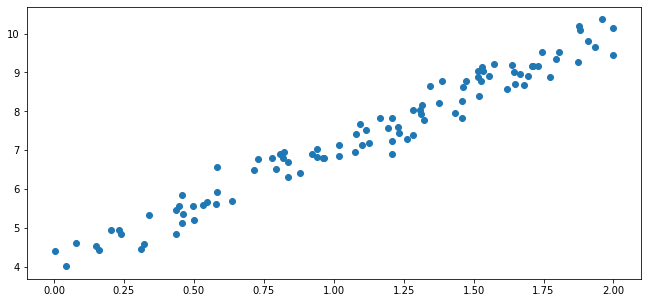

In [97]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,5))
plt.scatter(X,y)
plt.show()

In [52]:
def error(m,c,X,y):
    ypred= m*X+c
    err= ypred-y
    return np.sum(err*err)

In [53]:
error(3,4,np.array([1,2,3]),np.array([1,2,3]))

200

In [54]:
def grad_fit(X,y):
    m = np.random.random()
    c = np.random.random()
    learning_rate = 0.001
    for i in range(100):
        print("i: ", i, "Error: ",error(m, c, X, y))
        dE_dm = diffp(error, 0, m, c, X, y)
        dE_dc = diffp(error, 1, m, c, X, y)
        m= m-learning_rate*dE_dm
        c= c-learning_rate*dE_dc
    return (m,c)    

In [55]:
m, c = grad_fit(X,y)

i:  0 Error:  2884.4895540590524
i:  1 Error:  981.1886955830862
i:  2 Error:  341.4382790809532
i:  3 Error:  126.10843926707108
i:  4 Error:  53.335798143733584
i:  5 Error:  28.510470142500495
i:  6 Error:  19.831182790772168
i:  7 Error:  16.599599162603234
i:  8 Error:  15.221491252735483
i:  9 Error:  14.486776649845696
i:  10 Error:  13.987283168658019
i:  11 Error:  13.58453805402028
i:  12 Error:  13.230917787633757
i:  13 Error:  12.908864888211069
i:  14 Error:  12.61179766844338
i:  15 Error:  12.336328766155345
i:  16 Error:  12.080486622086298
i:  17 Error:  11.842636095255067
i:  18 Error:  11.621521623207913
i:  19 Error:  11.415934549817548
i:  20 Error:  11.224729841311106
i:  21 Error:  11.046970808172695
i:  22 Error:  10.881667665788175
i:  23 Error:  10.728026261768957
i:  24 Error:  10.585053090182733
i:  25 Error:  10.452096280833052
i:  26 Error:  10.32855532740023
i:  27 Error:  10.21364656232112
i:  28 Error:  10.106856656240572
i:  29 Error:  10.007458507219

In [56]:
m, c


(3.036910388198379, 3.9651833486127748)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


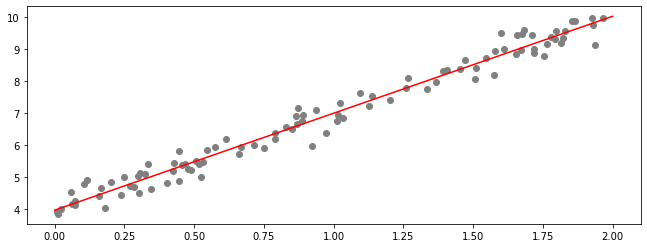

In [62]:
from matplotlib import pyplot as plt

x1 = 0
x2 = 2

y1 = m*x1 + c
y2 = m*x2 + c

ycap = m*X + c
plt.figure(figsize=(11,4))
plt.subplot()

# plt.scatter(X, ycap, color='r')
plt.plot([x1, x2], [y1, y2], color = 'red')
plt.subplot()
plt.scatter(X, y, color='grey')
plt.show()

# Backpropagation

In [64]:
#veri olusturalim

import numpy as np

X = np.random.random((100,1))
y = 4+3*X+.3*np.random.randn(100,1)


In [65]:
def neuron(w11,w12,x):
    r = w11*x+w12
    return r
def forward_nn(w11,w12,w21,w22,x):
    h1 = neuron(w11,w12,x)
    o1 = neuron(w21,w22,h1)
    return o1
def sq_error(o1,yy):
    e = o1-yy
    return e*e
def error_nn(w11, w12, w21, w22, x, yy):
    o1 = forward_nn(w11, w12, w21, w22, x)
    e = o1 - yy
    return e*e

In [73]:
w11 = 0.5
w12 = 0.4
w21 = 0.3
w22 = 0.1

learning_rate = 0.001

for epoch in range(100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        print(epoch*len(X)+i, error_nn(w11, w12, w21, w22, x, yy))
        dE_dw11 = diffp(error_nn, 0, w11, w12, w21, w22, x, yy)
        dE_dw12 = diffp(error_nn, 1, w11, w12, w21, w22, x, yy)
        dE_dw21 = diffp(error_nn, 2, w11, w12, w21, w22, x, yy)
        dE_dw22 = diffp(error_nn, 3, w11, w12, w21, w22, x, yy)
        
        w11 = w11 - learning_rate * dE_dw11
        w12 = w12 - learning_rate * dE_dw12
        
        w21 = w21 - learning_rate * dE_dw21
        w22 = w22 - learning_rate * dE_dw22

0 [9.06670066]
1 [31.38405004]
2 [23.83635708]
3 [20.85108344]
4 [38.51811296]
5 [22.22738563]
6 [13.58130492]
7 [32.3510708]
8 [14.46153933]
9 [25.58698871]
10 [45.41334481]
11 [23.1009294]
12 [25.96489963]
13 [23.74887521]
14 [30.9894255]
15 [26.64007237]
16 [34.93499143]
17 [30.02047445]
18 [31.3718837]
19 [37.64392601]
20 [19.40836251]
21 [43.15836415]
22 [32.11246922]
23 [22.70968353]
24 [30.66462645]
25 [30.47610678]
26 [29.70595449]
27 [37.1078034]
28 [30.35290775]
29 [14.78405895]
30 [28.5642269]
31 [29.0871061]
32 [24.14599314]
33 [36.90508774]
34 [25.56515701]
35 [31.05446229]
36 [12.10770972]
37 [14.46123182]
38 [18.30884727]
39 [17.72615193]
40 [25.65113815]
41 [30.14862485]
42 [14.65594263]
43 [10.90982334]
44 [16.1109213]
45 [15.99907115]
46 [17.45661565]
47 [12.53292189]
48 [26.74080877]
49 [25.95294716]
50 [11.89783619]
51 [14.83810685]
52 [17.95182576]
53 [12.91463059]
54 [23.54386187]
55 [34.02472943]
56 [13.01198369]
57 [22.06107006]
58 [11.21603771]
59 [13.08367152]

789 [0.13509351]
790 [0.00375166]
791 [0.05798866]
792 [0.29484188]
793 [0.07428434]
794 [0.17276153]
795 [0.83016027]
796 [0.00495307]
797 [0.00176205]
798 [0.41706286]
799 [0.26857849]
800 [1.43747741]
801 [0.21805472]
802 [0.04595246]
803 [0.03496463]
804 [0.00377557]
805 [0.01859826]
806 [0.07954421]
807 [0.03850344]
808 [0.01125782]
809 [0.07355629]
810 [0.47864807]
811 [0.33039701]
812 [0.11687288]
813 [9.64647209e-05]
814 [0.00187552]
815 [0.18486436]
816 [0.03916688]
817 [0.0078502]
818 [0.14252858]
819 [0.12266111]
820 [0.13335135]
821 [0.59781515]
822 [0.04778537]
823 [0.17425682]
824 [0.00776489]
825 [0.11189062]
826 [0.17461888]
827 [0.19110075]
828 [0.00047884]
829 [0.09905519]
830 [0.02529743]
831 [0.03788295]
832 [0.06945781]
833 [0.37093014]
834 [0.04272714]
835 [0.08487947]
836 [0.02894391]
837 [0.00658459]
838 [0.11867089]
839 [0.0015981]
840 [0.01034756]
841 [0.14570525]
842 [0.00114273]
843 [0.01301722]
844 [0.25898159]
845 [0.00815985]
846 [0.02375021]
847 [0.04796

1673 [0.28434088]
1674 [0.0091895]
1675 [0.16007944]
1676 [0.01753414]
1677 [0.0394409]
1678 [0.14472172]
1679 [0.06856706]
1680 [0.0371537]
1681 [0.09487037]
1682 [0.22767877]
1683 [0.00325666]
1684 [0.03552079]
1685 [0.13561453]
1686 [0.19793018]
1687 [0.1631418]
1688 [0.01631681]
1689 [0.15930593]
1690 [0.01856273]
1691 [0.03283048]
1692 [0.24553287]
1693 [0.04874618]
1694 [0.10593968]
1695 [0.67944038]
1696 [0.02440163]
1697 [0.00507859]
1698 [0.41415905]
1699 [0.17711013]
1700 [1.22073181]
1701 [0.29224485]
1702 [0.04120778]
1703 [0.02168458]
1704 [0.00058727]
1705 [0.01149844]
1706 [0.0312343]
1707 [0.02671296]
1708 [1.08792987e-06]
1709 [0.08856616]
1710 [0.36512678]
1711 [0.4229301]
1712 [0.13640859]
1713 [2.19292165e-05]
1714 [1.7114034e-06]
1715 [0.20755483]
1716 [0.01799817]
1717 [0.00288707]
1718 [0.12725988]
1719 [0.07744233]
1720 [0.11959924]
1721 [0.4870804]
1722 [0.0903685]
1723 [0.2233232]
1724 [0.00182375]
1725 [0.09727545]
1726 [0.16657207]
1727 [0.13716898]
1728 [0.

2156 [0.26511057]
2157 [7.43554901e-07]
2158 [0.01672038]
2159 [0.30083281]
2160 [0.0523667]
2161 [0.05290403]
2162 [0.11851263]
2163 [0.04353644]
2164 [0.11832306]
2165 [0.1310493]
2166 [0.01250316]
2167 [0.04497154]
2168 [0.02139049]
2169 [0.07484267]
2170 [0.04694772]
2171 [0.05370139]
2172 [0.51432855]
2173 [0.25038633]
2174 [0.0103645]
2175 [0.1357295]
2176 [0.01984084]
2177 [0.02750953]
2178 [0.14036441]
2179 [0.07873195]
2180 [0.02438155]
2181 [0.10709419]
2182 [0.2010294]
2183 [0.00826679]
2184 [0.03224025]
2185 [0.15236596]
2186 [0.17701628]
2187 [0.18611578]
2188 [0.00843048]
2189 [0.16882027]
2190 [0.02670454]
2191 [0.02548791]
2192 [0.22887389]
2193 [0.04067305]
2194 [0.08547775]
2195 [0.62854595]
2196 [0.03507793]
2197 [0.01272328]
2198 [0.41279025]
2199 [0.14829177]
2200 [1.14556449]
2201 [0.32173513]
2202 [0.03944458]
2203 [0.01756348]
2204 [0.00305266]
2205 [0.00928567]
2206 [0.01907077]
2207 [0.02302024]
2208 [0.00162827]
2209 [0.09453374]
2210 [0.32780822]
2211 [0.459

2671 [0.04196817]
2672 [0.53028642]
2673 [0.22667508]
2674 [0.01129018]
2675 [0.11901763]
2676 [0.02165218]
2677 [0.02010365]
2678 [0.13714459]
2679 [0.08671572]
2680 [0.01666434]
2681 [0.1165365]
2682 [0.18238646]
2683 [0.01341457]
2684 [0.02989933]
2685 [0.16528636]
2686 [0.16228871]
2687 [0.20395983]
2688 [0.00425984]
2689 [0.17607061]
2690 [0.03362731]
2691 [0.02069012]
2692 [0.21703622]
2693 [0.03516452]
2694 [0.07176303]
2695 [0.59239778]
2696 [0.04415457]
2697 [0.02058546]
2698 [0.41169055]
2699 [0.12863598]
2700 [1.0915414]
2701 [0.34430738]
2702 [0.03814224]
2703 [0.01478644]
2704 [0.00609322]
2705 [0.0077935]
2706 [0.01199976]
2707 [0.02049258]
2708 [0.0048168]
2709 [0.09910123]
2710 [0.30164935]
2711 [0.48813105]
2712 [0.14994302]
2713 [0.00020591]
2714 [0.0008472]
2715 [0.22304768]
2716 [0.00887943]
2717 [0.0010312]
2718 [0.11835541]
2719 [0.0543751]
2720 [0.11097175]
2721 [0.42343449]
2722 [0.12393568]
2723 [0.25798362]
2724 [0.00020878]
2725 [0.08884015]
2726 [0.16195146]

3521 [0.39606712]
3522 [0.14088113]
3523 [0.27470494]
3524 [2.90751914e-06]
3525 [0.08519538]
3526 [0.15996277]
3527 [0.09590182]
3528 [0.00582408]
3529 [0.03441931]
3530 [0.01098893]
3531 [0.01842805]
3532 [0.10303678]
3533 [0.2475001]
3534 [0.07991843]
3535 [0.04355498]
3536 [0.00093777]
3537 [0.06953074]
3538 [0.2348371]
3539 [0.01801378]
3540 [0.03584064]
3541 [0.09072988]
3542 [0.03459417]
3543 [0.01013762]
3544 [0.24857879]
3545 [5.81428434e-05]
3546 [0.01451358]
3547 [0.00736258]
3548 [0.00218104]
3549 [0.02749813]
3550 [0.00762646]
3551 [0.01054791]
3552 [0.02999893]
3553 [0.05232407]
3554 [1.55066649e-06]
3555 [0.42828836]
3556 [0.25546705]
3557 [0.00059547]
3558 [0.00771726]
3559 [0.29829874]
3560 [0.05982725]
3561 [0.04591354]
3562 [0.07677413]
3563 [0.05555751]
3564 [0.16142561]
3565 [0.13856397]
3566 [0.00387974]
3567 [0.02620721]
3568 [0.033131]
3569 [0.05547072]
3570 [0.04931677]
3571 [0.03001116]
3572 [0.54924974]
3573 [0.2002812]
3574 [0.01244098]
3575 [0.100754]
3576 

4020 [0.10548577]
4021 [0.3851248]
4022 [0.14813702]
4023 [0.28174022]
4024 [1.23422343e-05]
4025 [0.08372925]
4026 [0.15916077]
4027 [0.0911647]
4028 [0.00676622]
4029 [0.03150009]
4030 [0.01032071]
4031 [0.01748355]
4032 [0.10525454]
4033 [0.2408187]
4034 [0.08252588]
4035 [0.04150039]
4036 [0.0018532]
4037 [0.07562356]
4038 [0.24334949]
4039 [0.01962838]
4040 [0.037871]
4041 [0.08783115]
4042 [0.03819554]
4043 [0.01298988]
4044 [0.24785125]
4045 [5.99803959e-06]
4046 [0.01399791]
4047 [0.00601086]
4048 [0.00163316]
4049 [0.03011275]
4050 [0.00952641]
4051 [0.00968031]
4052 [0.03104104]
4053 [0.05675897]
4054 [4.15655164e-05]
4055 [0.41719443]
4056 [0.25361877]
4057 [0.00083222]
4058 [0.00638861]
4059 [0.29778348]
4060 [0.0612869]
4061 [0.04462637]
4062 [0.06983847]
4063 [0.058026]
4064 [0.17040943]
4065 [0.14004058]
4066 [0.00279115]
4067 [0.0231972]
4068 [0.03564447]
4069 [0.05212531]
4070 [0.04978833]
4071 [0.02626805]
4072 [0.5559799]
4073 [0.19135409]
4074 [0.01286412]
4075 [0.0

4491 [0.01321769]
4492 [0.1962572]
4493 [0.02605519]
4494 [0.04965742]
4495 [0.52906662]
4496 [0.06343557]
4497 [0.03995685]
4498 [0.40946842]
4499 [0.09612241]
4500 [0.99553012]
4501 [0.38746992]
4502 [0.03574381]
4503 [0.01027977]
4504 [0.01432981]
4505 [0.00537125]
4506 [0.00325182]
4507 [0.01628473]
4508 [0.01508831]
4509 [0.10787044]
4510 [0.25669181]
4511 [0.54244737]
4512 [0.16111144]
4513 [0.00048882]
4514 [0.00255022]
4515 [0.23571179]
4516 [0.00401908]
4517 [0.00024111]
4518 [0.11180652]
4519 [0.03933792]
4520 [0.10433648]
4521 [0.37729944]
4522 [0.1534995]
4523 [0.28690342]
4524 [5.29420291e-05]
4525 [0.08268443]
4526 [0.15859351]
4527 [0.08781932]
4528 [0.00748911]
4529 [0.02946112]
4530 [0.00985341]
4531 [0.01681973]
4532 [0.10686384]
4533 [0.2360537]
4534 [0.08442743]
4535 [0.04005226]
4536 [0.00271068]
4537 [0.08020525]
4538 [0.24962813]
4539 [0.02084641]
4540 [0.03936902]
4541 [0.08577181]
4542 [0.04092242]
4543 [0.0152806]
4544 [0.24730728]
4545 [1.73219664e-06]
4546 [

4964 [0.18111565]
4965 [0.14176803]
4966 [0.0017542]
4967 [0.0199416]
4968 [0.03866095]
4969 [0.04839183]
4970 [0.05034156]
4971 [0.02224658]
4972 [0.56379537]
4973 [0.18127284]
4974 [0.01336505]
4975 [0.08786227]
4976 [0.02569591]
4977 [0.00849452]
4978 [0.13049356]
4979 [0.10453764]
4980 [0.00533127]
4981 [0.13720766]
4982 [0.14661143]
4983 [0.02793524]
4984 [0.02529049]
4985 [0.19351647]
4986 [0.13376961]
4987 [0.2432754]
4988 [0.00010506]
4989 [0.1916745]
4990 [0.05038994]
4991 [0.01239595]
4992 [0.1937203]
4993 [0.02500073]
4994 [0.04715487]
4995 [0.52134944]
4996 [0.06610974]
4997 [0.04285496]
4998 [0.40917561]
4999 [0.09235388]
5000 [0.98372386]
5001 [0.39309111]
5002 [0.03544535]
5003 [0.00976855]
5004 [0.01561445]
5005 [0.00509706]
5006 [0.00253976]
5007 [0.01578923]
5008 [0.01679055]
5009 [0.10900576]
5010 [0.25128139]
5011 [0.54950873]
5012 [0.16255205]
5013 [0.00053328]
5014 [0.00282945]
5015 [0.23733851]
5016 [0.00354194]
5017 [0.00018072]
5018 [0.11099833]
5019 [0.0376167

5493 [0.02425033]
5494 [0.04538373]
5495 [0.5158184]
5496 [0.0680722]
5497 [0.04501399]
5498 [0.40895609]
5499 [0.0896735]
5500 [0.97521876]
5501 [0.39715083]
5502 [0.03522409]
5503 [0.00940468]
5504 [0.01657078]
5505 [0.00490149]
5506 [0.00207935]
5507 [0.01544079]
5508 [0.01807884]
5509 [0.10983894]
5510 [0.24743472]
5511 [0.55465364]
5512 [0.16360821]
5513 [0.00056727]
5514 [0.00303828]
5515 [0.23852955]
5516 [0.00321784]
5517 [0.00014284]
5518 [0.11042533]
5519 [0.03640454]
5520 [0.10290743]
5521 [0.36766873]
5522 [0.16030747]
5523 [0.29340933]
5524 [0.00014305]
5525 [0.08139434]
5526 [0.15789221]
5527 [0.08374033]
5528 [0.00844079]
5529 [0.0270156]
5530 [0.00928678]
5531 [0.01601108]
5532 [0.10888514]
5533 [0.23018304]
5534 [0.08683104]
5535 [0.0382813]
5536 [0.00400573]
5537 [0.08609908]
5538 [0.25755554]
5539 [0.02241389]
5540 [0.0412771]
5541 [0.08323884]
5542 [0.04444951]
5543 [0.01839298]
5544 [0.24663137]
5545 [3.60524507e-05]
5546 [0.01317128]
5547 [0.00410054]
5548 [0.0009

6053 [0.06570136]
6054 [0.00026543]
6055 [0.39656646]
6056 [0.25008993]
6057 [0.00138807]
6058 [0.00420526]
6059 [0.29676562]
6060 [0.06409241]
6061 [0.04221837]
6062 [0.0575509]
6063 [0.06287914]
6064 [0.18817549]
6065 [0.14289129]
6066 [0.00121347]
6067 [0.0179759]
6068 [0.0406603]
6069 [0.04606959]
6070 [0.05070338]
6071 [0.01983519]
6072 [0.56883178]
6073 [0.17492698]
6074 [0.01369476]
6075 [0.08361322]
6076 [0.02633537]
6077 [0.00719107]
6078 [0.12950049]
6079 [0.10734948]
6080 [0.00417872]
6081 [0.14041048]
6082 [0.14160166]
6083 [0.03053845]
6084 [0.02462934]
6085 [0.19788538]
6086 [0.12974122]
6087 [0.24939188]
6088 [4.15381784e-06]
6089 [0.1940778]
6090 [0.05315749]
6091 [0.01134919]
6092 [0.1903925]
6093 [0.02362823]
6094 [0.04392335]
6095 [0.51121413]
6096 [0.06973404]
6097 [0.04686853]
6098 [0.40875991]
6099 [0.0874534]
6100 [0.96810943]
6101 [0.40057459]
6102 [0.03503957]
6103 [0.00910466]
6104 [0.01739565]
6105 [0.00474031]
6106 [0.0017284]
6107 [0.01515099]
6108 [0.01919

6527 [0.08166171]
6528 [0.00895692]
6529 [0.02578349]
6530 [0.00900013]
6531 [0.01560045]
6532 [0.10993756]
6533 [0.22717184]
6534 [0.08808492]
6535 [0.03738093]
6536 [0.00478017]
6537 [0.08925269]
6538 [0.26173792]
6539 [0.02325436]
6540 [0.04228353]
6541 [0.08194154]
6542 [0.0463445]
6543 [0.02012802]
6544 [0.24627449]
6545 [7.14275416e-05]
6546 [0.01293573]
6547 [0.00361605]
6548 [0.00074401]
6549 [0.03596063]
6550 [0.01420481]
6551 [0.00797401]
6552 [0.03330029]
6553 [0.06666405]
6554 [0.00029946]
6555 [0.39447074]
6556 [0.2497259]
6557 [0.00145362]
6558 [0.00400546]
6559 [0.29666077]
6560 [0.06438468]
6561 [0.04197233]
6562 [0.05634806]
6563 [0.06339298]
6564 [0.19006293]
6565 [0.14318961]
6566 [0.00108731]
6567 [0.01747403]
6568 [0.04119596]
6569 [0.04546714]
6570 [0.05080003]
6571 [0.01922137]
6572 [0.57016212]
6573 [0.17327221]
6574 [0.01378271]
6575 [0.08250979]
6576 [0.02650578]
6577 [0.0068659]
6578 [0.12923745]
6579 [0.10809822]
6580 [0.00389802]
6581 [0.14125994]
6582 [0.1

7337 [0.09066682]
7338 [0.26359994]
7339 [0.02363118]
7340 [0.04273345]
7341 [0.08136964]
7342 [0.04719639]
7343 [0.02092102]
7344 [0.24611666]
7345 [9.08784389e-05]
7346 [0.0128325]
7347 [0.00341155]
7348 [0.00067469]
7349 [0.03656829]
7350 [0.01471928]
7351 [0.00781383]
7352 [0.03352858]
7353 [0.06768984]
7354 [0.00033782]
7355 [0.39225453]
7356 [0.24933949]
7357 [0.00152443]
7358 [0.00379912]
7359 [0.29654716]
7360 [0.06469555]
7361 [0.041713]
7362 [0.05508869]
7363 [0.06393876]
7364 [0.19207137]
7365 [0.14350477]
7366 [0.00096113]
7367 [0.0169498]
7368 [0.04176829]
7369 [0.04483183]
7370 [0.05090185]
7371 [0.01858168]
7372 [0.57157602]
7373 [0.17152604]
7374 [0.01387551]
7375 [0.08134827]
7376 [0.02668615]
7377 [0.00652827]
7378 [0.12896143]
7379 [0.10889252]
7380 [0.00361133]
7381 [0.142168]
7382 [0.1389152]
7383 [0.03200283]
7384 [0.0242738]
7385 [0.20028315]
7386 [0.12757903]
7387 [0.25275719]
7388 [5.88009733e-06]
7389 [0.19538604]
7390 [0.05469773]
7391 [0.01079799]
7392 [0.18

8117 [7.74136306e-05]
8118 [0.1092174]
8119 [0.03390753]
8120 [0.10164492]
8121 [0.35926756]
8122 [0.16644512]
8123 [0.29923695]
8124 [0.00025897]
8125 [0.08026844]
8126 [0.15728193]
8127 [0.08021992]
8128 [0.00932773]
8129 [0.02493601]
8130 [0.00880195]
8131 [0.01531562]
8132 [0.11067915]
8133 [0.22506657]
8134 [0.0889722]
8135 [0.03675499]
8136 [0.00536451]
8137 [0.09149965]
8138 [0.26469335]
8139 [0.02385436]
8140 [0.04299485]
8141 [0.08104027]
8142 [0.04770039]
8143 [0.02139359]
8144 [0.2460177]
8145 [0.00010348]
8146 [0.01277072]
8147 [0.003294]
8148 [0.00063609]
8149 [0.03692337]
8150 [0.01502611]
8151 [0.00771978]
8152 [0.03366472]
8153 [0.0682964]
8154 [0.00036115]
8155 [0.39096654]
8156 [0.24910763]
8157 [0.00156616]
8158 [0.00368038]
8159 [0.29647523]
8160 [0.06487533]
8161 [0.04156034]
8162 [0.05435663]
8163 [0.06426117]
8164 [0.19325548]
8165 [0.14369419]
8166 [0.0008907]
8167 [0.01664586]
8168 [0.04210266]
8169 [0.04446424]
8170 [0.05096336]
8171 [0.01821166]
8172 [0.57239

8905 [0.00446731]
8906 [0.00119437]
8907 [0.01464845]
8908 [0.02122537]
8909 [0.11176124]
8910 [0.23865831]
8911 [0.56658175]
8912 [0.16604364]
8913 [0.00064898]
8914 [0.00354926]
8915 [0.24127432]
8916 [0.00252961]
8917 [7.24031872e-05]
8918 [0.10910659]
8919 [0.03368289]
8920 [0.10153083]
8921 [0.3585001]
8922 [0.16701597]
8923 [0.29976807]
8924 [0.00027152]
8925 [0.0801619]
8926 [0.15722082]
8927 [0.07989783]
8928 [0.00941227]
8929 [0.02475164]
8930 [0.00875703]
8931 [0.01525124]
8932 [0.11084818]
8933 [0.2245963]
8934 [0.08917501]
8935 [0.03661407]
8936 [0.00549772]
8937 [0.0919979]
8938 [0.26534501]
8939 [0.02398621]
8940 [0.04315751]
8941 [0.08083575]
8942 [0.04800037]
8943 [0.02167735]
8944 [0.24596857]
8945 [0.00011123]
8946 [0.01273604]
8947 [0.00322535]
8948 [0.00061289]
8949 [0.03714173]
8950 [0.01520989]
8951 [0.00766505]
8952 [0.03374361]
8953 [0.06865786]
8954 [0.00037583]
8955 [0.3901849]
8956 [0.24897734]
8957 [0.00159245]
8958 [0.00361093]
8959 [0.29644288]
8960 [0.064

9812 [0.16618396]
9813 [0.00065404]
9814 [0.00357712]
9815 [0.24143254]
9816 [0.00249524]
9817 [6.93711883e-05]
9818 [0.1090398]
9819 [0.03354102]
9820 [0.10145087]
9821 [0.35801095]
9822 [0.16737973]
9823 [0.30012477]
9824 [0.0002794]
9825 [0.08009975]
9826 [0.15719158]
9827 [0.07969663]
9828 [0.00946487]
9829 [0.0246284]
9830 [0.00873023]
9831 [0.01521255]
9832 [0.11094961]
9833 [0.2243001]
9834 [0.08929825]
9835 [0.03652736]
9836 [0.00558722]
9837 [0.09233056]
9838 [0.26578263]
9839 [0.0240761]
9840 [0.04325729]
9841 [0.0807103]
9842 [0.0482012]
9843 [0.02186637]
9844 [0.24592542]
9845 [0.00011666]
9846 [0.01271106]
9847 [0.00317992]
9848 [0.00059856]
9849 [0.03728007]
9850 [0.01533233]
9851 [0.00762801]
9852 [0.03379805]
9853 [0.06889824]
9854 [0.00038523]
9855 [0.38968585]
9856 [0.24888075]
9857 [0.00160831]
9858 [0.00356491]
9859 [0.29640665]
9860 [0.06505334]
9861 [0.0414096]
9862 [0.05363823]
9863 [0.06457974]
9864 [0.19442754]
9865 [0.14387876]
9866 [0.00082377]
9867 [0.016348

In [74]:
ycap = forward_nn(w11, w12, w21, w22, X)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


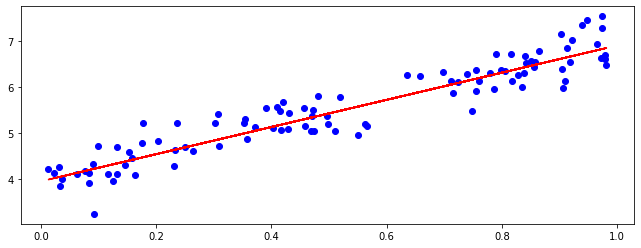

In [75]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.subplot()
plt.plot(X, ycap, color='r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

In [76]:

w11 = 0.5
w12 = 0.4
w21 = 0.3
w22 = 0.1

_w11 = None
_w12 = None
_w21 = None
_w22 = None

_dE_dw11 = None
_dE_dw12 = None
_dE_dw21 = None
_dE_dw22 = None

learning_rate = 0.01

def sn(g):
    if g < 0:
        return -1
    return 1

def gd(w, _w, grad, _grad):
    if _grad and sn(grad)*sn(_grad) < 0:
        return (w + _w)/2
    return w - learning_rate * grad

for epoch in range(100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        print(epoch*len(X)+i, error_nn(w11, w12, w21, w22, x, yy))
        dE_dw11 = diffp(error_nn, 0, w11, w12, w21, w22, x, yy)
        dE_dw12 = diffp(error_nn, 1, w11, w12, w21, w22, x, yy)
        dE_dw21 = diffp(error_nn, 2, w11, w12, w21, w22, x, yy)
        dE_dw22 = diffp(error_nn, 3, w11, w12, w21, w22, x, yy)
        
        w11_ = gd(w11, _w11, dE_dw11, _dE_dw11)
        _w11 = w11
        w11 = w11_
        w12_ = gd(w12, _w12, dE_dw12, _dE_dw12)
        _w12 = w12
        w12 = w12_
        w21_ = gd(w21, _w21, dE_dw21, _dE_dw21)
        _w21 = w21
        w21 = w21_
        w22_ = gd(w22, _w22, dE_dw22, _dE_dw22)
        _w22 = w22
        w22 = w22_
        
        _dE_dw11 = dE_dw11
        _dE_dw12 = dE_dw12
        _dE_dw21 = dE_dw21
        _dE_dw22 = dE_dw22


0 [9.06670066]
1 [30.48740913]
2 [21.42484157]
3 [17.46302272]
4 [31.27850637]
5 [15.53207129]
6 [8.17787495]
7 [20.55489387]
8 [7.10260449]
9 [13.10505461]
10 [22.79009366]
11 [8.52677888]
12 [7.93738054]
13 [5.23412119]
14 [6.02998296]
15 [4.39941657]
16 [4.20357825]
17 [2.05658507]
18 [1.97713926]
19 [1.6245861]
20 [0.00144258]
21 [1.90516313]
22 [0.00200856]
23 [0.20912827]
24 [0.03773284]
25 [0.1328258]
26 [0.12550243]
27 [0.12517175]
28 [0.0275165]
29 [0.30061799]
30 [0.01235001]
31 [0.00955835]
32 [0.14512935]
33 [0.27448209]
34 [0.08778436]
35 [0.04147804]
36 [0.15264609]
37 [0.01792457]
38 [0.02960663]
39 [0.0133319]
40 [0.02518044]
41 [0.13221807]
42 [0.01499244]
43 [0.08899378]
44 [0.28299183]
45 [0.00372967]
46 [0.00659772]
47 [0.04273437]
48 [0.13791936]
49 [0.03438464]
50 [0.01190193]
51 [0.01376001]
52 [0.04567112]
53 [0.0058455]
54 [0.06020972]
55 [0.86493693]
56 [0.5110166]
57 [0.00054919]
58 [0.1521928]
59 [0.42436542]
60 [0.01657712]
61 [0.05353386]
62 [0.27486603]
6

830 [0.00079278]
831 [0.00015149]
832 [0.19765294]
833 [0.12942242]
834 [0.16182663]
835 [0.00646707]
836 [0.00344309]
837 [0.02997411]
838 [0.15482747]
839 [0.00046915]
840 [0.11106951]
841 [0.06204155]
842 [0.01218498]
843 [0.00025532]
844 [0.36185756]
845 [0.01279795]
846 [0.04350385]
847 [0.01709473]
848 [0.00047938]
849 [0.04116152]
850 [0.00298588]
851 [0.01895161]
852 [0.01889586]
853 [0.03866847]
854 [0.00474546]
855 [0.36554847]
856 [0.29555728]
857 [0.00492923]
858 [0.01382012]
859 [0.3069763]
860 [0.01772348]
861 [0.00929006]
862 [0.0331175]
863 [0.14547578]
864 [0.26506143]
865 [0.1977512]
866 [0.00642331]
867 [0.02064925]
868 [0.01118169]
869 [0.11453489]
870 [0.08661094]
871 [0.03013085]
872 [0.47021846]
873 [0.09912527]
874 [0.11014116]
875 [0.02764406]
876 [0.12495931]
877 [0.14697904]
878 [0.06361754]
879 [0.19692894]
880 [5.12872957e-06]
881 [0.03296611]
882 [0.06931889]
883 [0.01827459]
884 [0.00027867]
885 [0.04028706]
886 [0.05640172]
887 [0.04550599]
888 [0.022148

1323 [0.17128375]
1324 [0.02348441]
1325 [0.02215905]
1326 [0.07319229]
1327 [0.00755723]
1328 [0.09488044]
1329 [0.10658318]
1330 [0.0013457]
1331 [2.6751971e-05]
1332 [0.20510223]
1333 [0.11798588]
1334 [0.1712536]
1335 [0.00457449]
1336 [0.00078673]
1337 [0.04057626]
1338 [0.17277847]
1339 [9.69131201e-05]
1340 [0.12082863]
1341 [0.05756577]
1342 [0.0180163]
1343 [0.0021398]
1344 [0.36934676]
1345 [0.01109808]
1346 [0.04402819]
1347 [0.01340584]
1348 [1.08124731e-05]
1349 [0.04732586]
1350 [0.01453419]
1351 [0.01013329]
1352 [0.03388065]
1353 [0.06134296]
1354 [0.00251497]
1355 [0.387408]
1356 [0.26147458]
1357 [0.0022275]
1358 [0.00622168]
1359 [0.28709363]
1360 [0.0158601]
1361 [0.00625004]
1362 [0.02175913]
1363 [0.15619227]
1364 [0.29566005]
1365 [0.20300751]
1366 [0.0034615]
1367 [0.01473112]
1368 [0.01511328]
1369 [0.1055495]
1370 [0.0875604]
1371 [0.02248523]
1372 [0.48456471]
1373 [0.08501567]
1374 [0.11183868]
1375 [0.0210424]
1376 [0.1289184]
1377 [0.13165226]
1378 [0.0593

1802 [0.01659072]
1803 [0.02538013]
1804 [0.03102318]
1805 [0.01502357]
1806 [0.00835309]
1807 [0.09208665]
1808 [0.04489901]
1809 [0.15797357]
1810 [0.24926985]
1811 [0.42630907]
1812 [0.03964757]
1813 [0.04834988]
1814 [0.09609334]
1815 [0.11577896]
1816 [0.0237538]
1817 [0.02727753]
1818 [0.04089202]
1819 [0.00110013]
1820 [0.2084432]
1821 [0.19368506]
1822 [0.30482966]
1823 [0.1737586]
1824 [0.02394726]
1825 [0.02199627]
1826 [0.07320919]
1827 [0.0071133]
1828 [0.09559911]
1829 [0.10416641]
1830 [0.00144723]
1831 [1.62561102e-05]
1832 [0.20630238]
1833 [0.11622569]
1834 [0.172774]
1835 [0.00430452]
1836 [0.0005413]
1837 [0.04237581]
1838 [0.17566555]
1839 [6.33075676e-05]
1840 [0.1223885]
1841 [0.05686529]
1842 [0.01903]
1843 [0.00260165]
1844 [0.37051]
1845 [0.01084076]
1846 [0.04411061]
1847 [0.01287595]
1848 [5.30233714e-05]
1849 [0.04883161]
1850 [0.01553895]
1851 [0.00981325]
1852 [0.03437672]
1853 [0.06317496]
1854 [0.00276018]
1855 [0.38325113]
1856 [0.26115218]
1857 [0.0024

2605 [0.01508915]
2606 [0.00857036]
2607 [0.09169491]
2608 [0.04543079]
2609 [0.15809743]
2610 [0.248069]
2611 [0.42781215]
2612 [0.03987365]
2613 [0.04819116]
2614 [0.09629316]
2615 [0.11613792]
2616 [0.02392034]
2617 [0.02734572]
2618 [0.04087744]
2619 [0.00105714]
2620 [0.20791523]
2621 [0.19315219]
2622 [0.30555025]
2623 [0.17450556]
2624 [0.02402687]
2625 [0.02199308]
2626 [0.07328347]
2627 [0.00702993]
2628 [0.09569948]
2629 [0.103451]
2630 [0.00146947]
2631 [1.42586029e-05]
2632 [0.20656813]
2633 [0.1158031]
2634 [0.17312896]
2635 [0.00424202]
2636 [0.00048332]
2637 [0.04286586]
2638 [0.17645361]
2639 [5.44369812e-05]
2640 [0.12274776]
2641 [0.05666718]
2642 [0.01930404]
2643 [0.00273409]
2644 [0.37076104]
2645 [0.01076509]
2646 [0.04412583]
2647 [0.01274387]
2648 [7.01171475e-05]
2649 [0.04924512]
2650 [0.01579075]
2651 [0.00974046]
2652 [0.03448395]
2653 [0.06363229]
2654 [0.00282552]
2655 [0.3821317]
2656 [0.2610797]
2657 [0.00247028]
2658 [0.00563004]
2659 [0.28739451]
2660 

3540 [0.12270268]
3541 [0.05664253]
3542 [0.01933176]
3543 [0.00274897]
3544 [0.37070929]
3545 [0.0107483]
3546 [0.04411886]
3547 [0.01274302]
3548 [7.23776413e-05]
3549 [0.0492928]
3550 [0.01578591]
3551 [0.00974892]
3552 [0.03446187]
3553 [0.06362686]
3554 [0.00283071]
3555 [0.38200384]
3556 [0.26109648]
3557 [0.0024771]
3558 [0.00562661]
3559 [0.28744498]
3560 [0.01641896]
3561 [0.00608835]
3562 [0.02019701]
3563 [0.15701434]
3564 [0.30032553]
3565 [0.2027654]
3566 [0.00304573]
3567 [0.01386495]
3568 [0.01633631]
3569 [0.10307817]
3570 [0.08716291]
3571 [0.02117774]
3572 [0.48883893]
3573 [0.08272207]
3574 [0.11151686]
3575 [0.02003483]
3576 [0.12903226]
3577 [0.12773052]
3578 [0.05872433]
3579 [0.2121718]
3580 [0.00088835]
3581 [0.04416032]
3582 [0.07924128]
3583 [0.00229824]
3584 [0.00056108]
3585 [0.06786268]
3586 [0.03924693]
3587 [0.04607931]
3588 [0.03596337]
3589 [0.43798673]
3590 [0.00418203]
3591 [0.10859475]
3592 [0.38614858]
3593 [0.01932301]
3594 [0.02236423]
3595 [0.748

4419 [0.00107998]
4420 [0.20762528]
4421 [0.19341748]
4422 [0.30524777]
4423 [0.17480827]
4424 [0.02393394]
4425 [0.02208667]
4426 [0.07345748]
4427 [0.00708805]
4428 [0.09551826]
4429 [0.10317597]
4430 [0.00146166]
4431 [1.46424963e-05]
4432 [0.20650039]
4433 [0.11582274]
4434 [0.17308341]
4435 [0.00424805]
4436 [0.0004738]
4437 [0.04295191]
4438 [0.17660837]
4439 [4.96454607e-05]
4440 [0.12265289]
4441 [0.05662285]
4442 [0.01935387]
4443 [0.00276124]
4444 [0.37064068]
4445 [0.01073182]
4446 [0.04410734]
4447 [0.01274149]
4448 [7.40449236e-05]
4449 [0.04932781]
4450 [0.01577879]
4451 [0.00975653]
4452 [0.03444198]
4453 [0.06361816]
4454 [0.00283287]
4455 [0.38191669]
4456 [0.26110232]
4457 [0.00248144]
4458 [0.00562521]
4459 [0.28749099]
4460 [0.01646224]
4461 [0.0061102]
4462 [0.02022772]
4463 [0.15690071]
4464 [0.30019309]
4465 [0.20277435]
4466 [0.00303082]
4467 [0.01384623]
4468 [0.01633457]
4469 [0.10305759]
4470 [0.08716655]
4471 [0.02114985]
4472 [0.48880954]
4473 [0.0827863]
4

4991 [0.10850043]
4992 [0.38606746]
4993 [0.019271]
4994 [0.02235101]
4995 [0.74817675]
4996 [0.01078078]
4997 [0.0833454]
4998 [0.26914606]
4999 [0.05119591]
5000 [0.78678053]
5001 [0.10406053]
5002 [0.01636154]
5003 [0.02517732]
5004 [0.03030462]
5005 [0.01503575]
5006 [0.00854333]
5007 [0.09169839]
5008 [0.04548236]
5009 [0.15833639]
5010 [0.24867038]
5011 [0.42864943]
5012 [0.04027996]
5013 [0.04777218]
5014 [0.09566284]
5015 [0.11649538]
5016 [0.02368858]
5017 [0.02714052]
5018 [0.04102124]
5019 [0.00108753]
5020 [0.20753326]
5021 [0.19350487]
5022 [0.30514769]
5023 [0.17490362]
5024 [0.0239037]
5025 [0.02211695]
5026 [0.07351348]
5027 [0.00710761]
5028 [0.09545721]
5029 [0.10309211]
5030 [0.00145897]
5031 [1.47759346e-05]
5032 [0.20647675]
5033 [0.11583344]
5034 [0.17306558]
5035 [0.00425058]
5036 [0.00047163]
5037 [0.04297186]
5038 [0.17664536]
5039 [4.81873794e-05]
5040 [0.12261344]
5041 [0.05661813]
5042 [0.01936646]
5043 [0.00276858]
5044 [0.3705862]
5045 [0.01072046]
5046 [0

5679 [0.21197849]
5680 [0.00088088]
5681 [0.04420505]
5682 [0.079304]
5683 [0.00227216]
5684 [0.00057006]
5685 [0.06798458]
5686 [0.03937557]
5687 [0.04624504]
5688 [0.03579626]
5689 [0.43744358]
5690 [0.00417077]
5691 [0.1084872]
5692 [0.38609245]
5693 [0.01924691]
5694 [0.02234217]
5695 [0.74824293]
5696 [0.01076938]
5697 [0.08334578]
5698 [0.2691146]
5699 [0.05119322]
5700 [0.78683406]
5701 [0.10417671]
5702 [0.01630239]
5703 [0.02510832]
5704 [0.03026197]
5705 [0.0150153]
5706 [0.00852793]
5707 [0.09170838]
5708 [0.0454744]
5709 [0.15838425]
5710 [0.24884975]
5711 [0.42891225]
5712 [0.04040015]
5713 [0.04764809]
5714 [0.09546247]
5715 [0.11660405]
5716 [0.02360882]
5717 [0.02707042]
5718 [0.04106612]
5719 [0.0010989]
5720 [0.20742907]
5721 [0.19363643]
5722 [0.30499416]
5723 [0.17500599]
5724 [0.02386155]
5725 [0.02215689]
5726 [0.07358482]
5727 [0.00713427]
5728 [0.09537543]
5729 [0.10300839]
5730 [0.00145563]
5731 [1.4969155e-05]
5732 [0.2064455]
5733 [0.11585337]
5734 [0.1730390

6361 [0.00616381]
6362 [0.02029191]
6363 [0.15664188]
6364 [0.29991133]
6365 [0.20273965]
6366 [0.00300606]
6367 [0.01381646]
6368 [0.01635654]
6369 [0.10297168]
6370 [0.08713944]
6371 [0.02109507]
6372 [0.48881488]
6373 [0.08292659]
6374 [0.1111146]
6375 [0.02015782]
6376 [0.12863416]
6377 [0.12724077]
6378 [0.05876905]
6379 [0.21190596]
6380 [0.00087951]
6381 [0.04424622]
6382 [0.0793211]
6383 [0.00225695]
6384 [0.000574]
6385 [0.06805544]
6386 [0.03941404]
6387 [0.04631801]
6388 [0.03575595]
6389 [0.43727575]
6390 [0.00417261]
6391 [0.10842975]
6392 [0.38603684]
6393 [0.01921663]
6394 [0.02232479]
6395 [0.74821343]
6396 [0.01076904]
6397 [0.08336646]
6398 [0.26909784]
6399 [0.05117742]
6400 [0.78686702]
6401 [0.10430071]
6402 [0.01625844]
6403 [0.02505524]
6404 [0.03021832]
6405 [0.01500144]
6406 [0.00852339]
6407 [0.09170954]
6408 [0.04549565]
6409 [0.15845776]
6410 [0.24899444]
6411 [0.42916786]
6412 [0.04051967]
6413 [0.04752605]
6414 [0.09528222]
6415 [0.11672558]
6416 [0.023539

7122 [0.30473204]
7123 [0.17523825]
7124 [0.02378413]
7125 [0.02223379]
7126 [0.07372587]
7127 [0.00718227]
7128 [0.0952332]
7129 [0.10280802]
7130 [0.00144905]
7131 [1.5312626e-05]
7132 [0.20638719]
7133 [0.11587561]
7134 [0.17299711]
7135 [0.00426037]
7136 [0.00046355]
7137 [0.04304659]
7138 [0.17678414]
7139 [4.32650256e-05]
7140 [0.12248531]
7141 [0.05657354]
7142 [0.01941032]
7143 [0.0027946]
7144 [0.37042007]
7145 [0.01068357]
7146 [0.04407421]
7147 [0.01274553]
7148 [7.87499079e-05]
7149 [0.04942311]
7150 [0.01574411]
7151 [0.00978494]
7152 [0.03437292]
7153 [0.06356746]
7154 [0.00283912]
7155 [0.38167597]
7156 [0.26114251]
7157 [0.00249431]
7158 [0.00562704]
7159 [0.28764018]
7160 [0.01660375]
7161 [0.00617988]
7162 [0.02031889]
7163 [0.15655384]
7164 [0.29979886]
7165 [0.2027709]
7166 [0.00298981]
7167 [0.01379473]
7168 [0.01634214]
7169 [0.10297703]
7170 [0.08715875]
7171 [0.02107023]
7172 [0.4887283]
7173 [0.08298131]
7174 [0.11101186]
7175 [0.02019092]
7176 [0.12853316]
717

7578 [0.05880639]
7579 [0.21176448]
7580 [0.00087358]
7581 [0.04429316]
7582 [0.07937418]
7583 [0.00223679]
7584 [0.00058099]
7585 [0.06815229]
7586 [0.03949391]
7587 [0.046431]
7588 [0.03566283]
7589 [0.43695124]
7590 [0.00417589]
7591 [0.10833791]
7592 [0.38593467]
7593 [0.01917098]
7594 [0.02231293]
7595 [0.74820639]
7596 [0.0107643]
7597 [0.0833663]
7598 [0.26908569]
7599 [0.05117576]
7600 [0.78698463]
7601 [0.10449573]
7602 [0.01616921]
7603 [0.02494764]
7604 [0.03015378]
7605 [0.0149686]
7606 [0.00850075]
7607 [0.09171569]
7608 [0.04550059]
7609 [0.15855776]
7610 [0.24931891]
7611 [0.42956916]
7612 [0.04072672]
7613 [0.04731273]
7614 [0.09494751]
7615 [0.11689439]
7616 [0.02341443]
7617 [0.02689835]
7618 [0.04118583]
7619 [0.0011259]
7620 [0.20712802]
7621 [0.19394503]
7622 [0.30463967]
7623 [0.1753149]
7624 [0.0237574]
7625 [0.02226011]
7626 [0.07377383]
7627 [0.0072013]
7628 [0.09517451]
7629 [0.10273769]
7630 [0.00144588]
7631 [1.55053873e-05]
7632 [0.2063572]
7633 [0.11589355

8082 [0.07937886]
8083 [0.00222792]
8084 [0.00058302]
8085 [0.06819208]
8086 [0.03951926]
8087 [0.04648132]
8088 [0.03563325]
8089 [0.4368319]
8090 [0.00417136]
8091 [0.1083119]
8092 [0.38593196]
8093 [0.01914896]
8094 [0.0223004]
8095 [0.74821074]
8096 [0.01076048]
8097 [0.08338051]
8098 [0.26906464]
8099 [0.05116439]
8100 [0.78699589]
8101 [0.1045977]
8102 [0.01613158]
8103 [0.02490462]
8104 [0.03011387]
8105 [0.01495637]
8106 [0.00849588]
8107 [0.09170709]
8108 [0.04551633]
8109 [0.15860702]
8110 [0.24941406]
8111 [0.42975984]
8112 [0.0408059]
8113 [0.04723338]
8114 [0.0948431]
8115 [0.11696795]
8116 [0.02337999]
8117 [0.02686561]
8118 [0.04121156]
8119 [0.00112986]
8120 [0.20704355]
8121 [0.19398822]
8122 [0.3045948]
8123 [0.17541046]
8124 [0.0237388]
8125 [0.02228168]
8126 [0.0738166]
8127 [0.00721433]
8128 [0.0951316]
8129 [0.10264701]
8130 [0.00144462]
8131 [1.55641566e-05]
8132 [0.20634715]
8133 [0.11588745]
8134 [0.17297001]
8135 [0.00426399]
8136 [0.00045785]
8137 [0.04309923

8967 [0.01375468]
8968 [0.01637058]
8969 [0.10287285]
8970 [0.08713653]
8971 [0.02099883]
8972 [0.48875865]
8973 [0.08307623]
8974 [0.11074964]
8975 [0.02025472]
8976 [0.12828072]
8977 [0.12675812]
8978 [0.05881055]
8979 [0.21168896]
8980 [0.00087495]
8981 [0.04434662]
8982 [0.07937101]
8983 [0.00221078]
8984 [0.00058592]
8985 [0.06826614]
8986 [0.03954907]
8987 [0.04657358]
8988 [0.03559456]
8989 [0.43664812]
8990 [0.00417675]
8991 [0.10823353]
8992 [0.38584639]
8993 [0.01910271]
8994 [0.02227101]
8995 [0.74818307]
8996 [0.01075942]
8997 [0.08342288]
8998 [0.26902847]
8999 [0.05113252]
9000 [0.78698553]
9001 [0.10473653]
9002 [0.0160756]
9003 [0.02484168]
9004 [0.03006252]
9005 [0.01494363]
9006 [0.00849292]
9007 [0.09171658]
9008 [0.0455447]
9009 [0.15869812]
9010 [0.2496267]
9011 [0.43013069]
9012 [0.04096462]
9013 [0.04707081]
9014 [0.09460365]
9015 [0.11711825]
9016 [0.0232904]
9017 [0.02678385]
9018 [0.04127451]
9019 [0.00114271]
9020 [0.20688365]
9021 [0.19413332]
9022 [0.304429

9431 [1.58390805e-05]
9432 [0.20629712]
9433 [0.11590305]
9434 [0.17293589]
9435 [0.00426854]
9436 [0.0004516]
9437 [0.04315747]
9438 [0.17698369]
9439 [3.78668012e-05]
9440 [0.12236038]
9441 [0.05651193]
9442 [0.01947385]
9443 [0.00282973]
9444 [0.37026471]
9445 [0.01064103]
9446 [0.04404884]
9447 [0.01274258]
9448 [8.42132972e-05]
9449 [0.04953163]
9450 [0.0157282]
9451 [0.00980602]
9452 [0.03431886]
9453 [0.063548]
9454 [0.00284892]
9455 [0.38140051]
9456 [0.2611781]
9457 [0.00250892]
9458 [0.0056222]
9459 [0.28776976]
9460 [0.01672865]
9461 [0.00623956]
9462 [0.02038924]
9463 [0.15625401]
9464 [0.29948214]
9465 [0.20275336]
9466 [0.00295359]
9467 [0.01374931]
9468 [0.01635507]
9469 [0.10288902]
9470 [0.08714702]
9471 [0.0209944]
9472 [0.48868632]
9473 [0.08313939]
9474 [0.11068229]
9475 [0.02028866]
9476 [0.12820918]
9477 [0.12671978]
9478 [0.05881861]
9479 [0.21162266]
9480 [0.00087029]
9481 [0.04434074]
9482 [0.07940563]
9483 [0.00220955]
9484 [0.00058826]
9485 [0.06827506]
9486 

In [77]:
# Initialize
w11 = 0.5
w12 = 0.5
w21 = 0.5
w22 = 0.5

def neuron(w11, w12, x):
    #TODO: activation function
    return w11*x + w12

def sq_error(o1, yy):
    e = o1 - yy
    return e*e

# Learning Rate
eta = 0.01

for epoch in range(50):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        #Forward Pass
        h1 = neuron(w11, w12, x)
        o1 = neuron(w21, w22, h1)

        dE_do1 = diffp(sq_error, 0, o1, yy)
        do1_dw21 = diffp(neuron, 0, w21, w22, h1)
        dE_w21 = dE_do1 * do1_dw21
        
        do1_dw22 = diffp(neuron, 1, w21, w22, h1)
        dE_w22 = dE_do1 * do1_dw22
        
        do1_dh = diffp(neuron, 2, w21, w22, h1)
        dE_dh = dE_do1 * do1_dh
        dh_dw11 = diffp(neuron, 0, w11, w12, x)
        dE_dw11 = dE_dh * dh_dw11

        dh_dw12 = diffp(neuron, 1, w11, w12, x)
        dE_dw12 = dE_do1 * do1_dh * dh_dw12
        
        w11 = w11 - eta * dE_dw11
        w12 = w12 - eta * dE_dw12

        w21 = w21 - eta * dE_w21
        w22 = w22 - eta * dE_w22

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


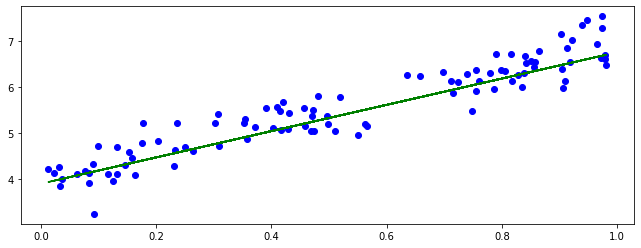

In [78]:
h1 = neuron(w11, w12, X)
ycap1 = neuron(w21, w22, h1)

from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
# plt.subplot()
# plt.scatter(X, ycap, color='r')
plt.subplot()
plt.plot(X, ycap1, color='g')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()